In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import imageio
import matplotlib
import gc
import sys

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [2]:
a=1

In [3]:
# folder = rf"H:\phd stuff\tidy3d\data\10_07_2024 Beam Spreading Broad Bandwidth Periodic Conditions Freq Domain"
folder = rf"H:\phd stuff\tidy3d\data\10_04_2024 Beam Spreading Tight Bandwidth Periodic Conditions L=12"
       
data = []
files_to_download = []
for item in os.listdir(folder):
    chi_path = os.path.join(folder, item)
    for i,item2 in enumerate(natsorted(os.listdir(chi_path))):
        chi_freq_folder=os.path.join(chi_path, item2)
        for j,item3 in enumerate(natsorted(os.listdir(chi_freq_folder))):
            file=os.path.join(chi_freq_folder, item3)
            if item3 in ["chi_0.39_N_10000_posics Beam Spreading 0.28 - 0.31 - Sample_4 50.0ps L=12a.txt"]:
                sim_result=AM.loadFromFile(key=tidy3dAPI, file_path=file, save_path=rf"F:\2D SHU Chi Statistics", only_download=False, get_ref=False).sim_data
                # AM.create_movie(sim_result, monitor_lambdas = np.array([0.14 - 0.18]),name='Spreading',type='t',log=False,path=rf"F:\2D SHU Chi Statistics\data\10_04_2024 Beam Spreading Tight Bandwidth Periodic Conditions L=12/movies/{item3}",frames_per_second=10,rem_frames=False, normalize=True, a=1)
                raise(Exception)
            # sim_result = (AM.loadFromFile(key = tidy3dAPI, file_path=file, save_path=rf"F:\2D SHU Chi Statistics",only_download=True))
            # data += [{"data":sim_result, "filename":item3}]

# def download_file(file):
#     try:
#         AM.loadFromFile(key=tidy3dAPI, file_path=file, save_path=rf"F:\2D SHU Chi Statistics", only_download=False, get_ref=False).sim_data
#     except:
#         print(file)
#     return False

Configured successfully.


Exception: 

In [4]:
# from concurrent.futures import ThreadPoolExecutor, as_completed

# # Execute the download in parallel using ThreadPoolExecutor
# with ThreadPoolExecutor() as executor:
#     # Submit all file download tasks to the executor
#     future_to_file = [executor.submit(download_file, file) for file in files_to_download]


In [12]:
sim = sim_result.simulation

Text(0, 0.5, 'y(um)')

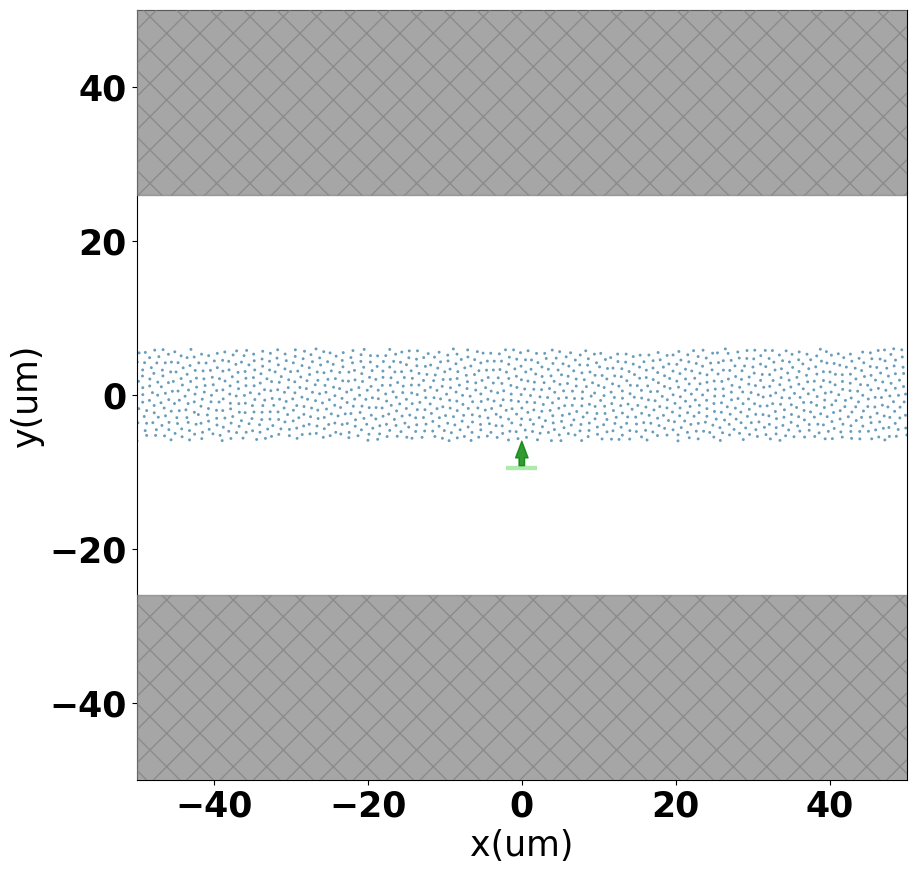

In [10]:
import matplotlib
font = {
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

f, ax1 = plt.subplots(figsize=(10, 10))
ax1 = sim.plot(z=0, ax=ax1,monitor_alpha=0, vlim=[-50,50])
ax1.set_title("")
ax1.set_xlabel("x(um)")
ax1.set_ylabel("y(um)")



In [13]:
sim_result.simulation.sources

(PlaneWave(attrs={}, name='planewave', type='PlaneWave', center=(0.0, -9.57382773142857, 0.0), size=(4.0, 0.0, inf), source_time=GaussianPulse(attrs={}, amplitude=1.0, phase=0.0, type='GaussianPulse', freq0=88438775110000.0, fwidth=3147820809000.0, offset=5.0, remove_dc_component=True), direction='+', angle_theta=0.0, angle_phi=0.0, pol_angle=1.5707963267948966),)